## Regresion Lineal: Costo de un incidente de Seguridad.

En este ejercicio se explican los fundamentos basicos de la regresion lineal, aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio.

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados. El conjunto de datos es genrado de  manera aleatoria.

# 1.- Generacion del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))



La longitud del DataSet es:  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

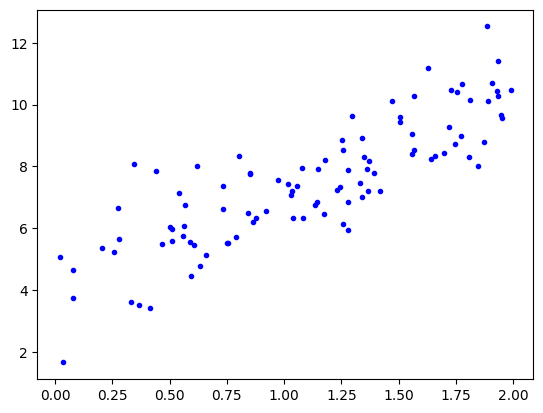

In [3]:
plt.plot(X, y, "b.")
plt.show()

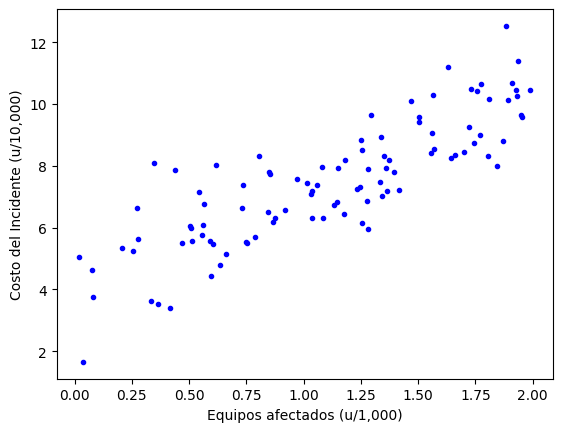

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

# 3.- Modificacion del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)


,No_Equipos_Afectados,Costo
0,1.416653,7.206953
1,1.469717,10.113362
2,1.232901,7.237528
3,1.349350,8.313659
4,0.077328,4.631944
5,1.392359,7.786886
6,1.360389,7.920949
7,1.083574,6.324954
8,0.416775,3.408366
9,0.510217,5.986208


In [7]:
# Escalado del numero de equipos afcetados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Ecalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1416,72069
1,1469,101133
2,1232,72375
3,1349,83136
4,77,46319
5,1392,77868
6,1360,79209
7,1083,63249
8,416,34083
9,510,59862


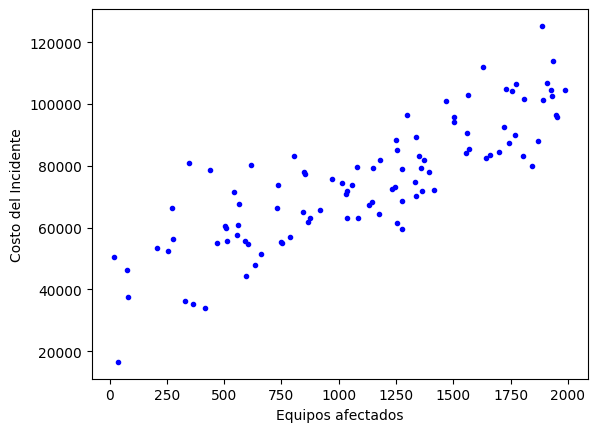

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 4.- Construccion del Modelo.

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [13]:
# Parametro Tetha 0
lin_reg.intercept_

np.float64(40794.72323638943)

In [14]:
# Paramètro Tetha 1
lin_reg.coef_

array([30.72896156])

In [20]:
# Predicion para el valor minimo y maximo para el conjunto de datos de entrenamiento.
X_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

<function matplotlib.pyplot.show(close=None, block=None)>

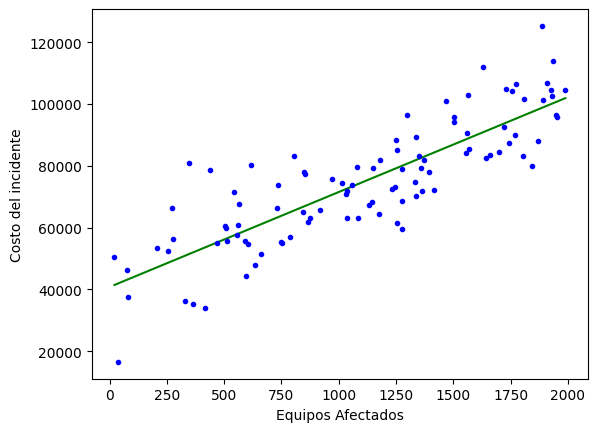

In [21]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show

# 5.- Prediccion de nuevos ejemplos

In [28]:
x_new = np.array([[2700]]) #Numero de equipos afectados.
# Predicion del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 123762


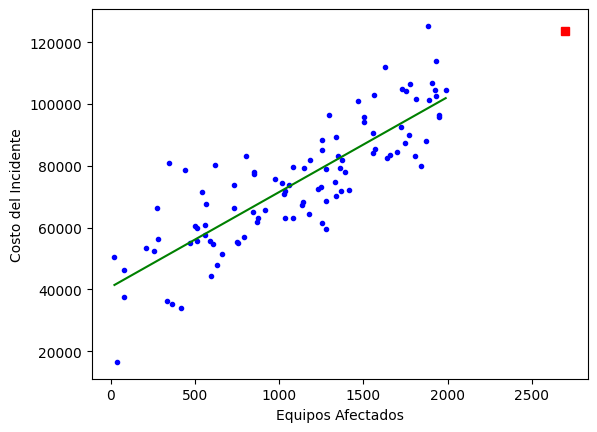

In [29]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()